In [1]:
# Importing Modules 
import pandas as pd 
import numpy as np

# Importing data 

DJI_DF = pd.read_csv('./DATA/INDICES/DJI.csv', parse_dates=True, infer_datetime_format=True, index_col="Date" )

NQ_DF = pd.read_csv('./DATA/INDICES/NQ.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")

R2K_DF = pd.read_csv('./DATA/INDICES/R2K.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")

R3K_DF = pd.read_csv('./DATA/INDICES/R3K.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")

SP_DF = pd.read_csv('./DATA/INDICES/SP.csv', parse_dates=True, infer_datetime_format=True, index_col="Date")

# Renaming DataFrames for concatenation 
DJI_DF = DJI_DF.rename(columns={'Close': 'DJI_Close'})

NQ_DF = NQ_DF.rename(columns={'Close': 'NQ_Close'})

R2K_DF = R2K_DF.rename(columns={'Close': 'R2K_Close'})

SP_DF = SP_DF.rename(columns={'Close': 'SP_Close'})

# Concatenating DF's into volatility DF 
volatility_df = pd.concat([DJI_DF, NQ_DF, R2K_DF, SP_DF], axis=1)

# Creating Dialy Returns 
volatility_df['return_DJI'] = volatility_df['DJI_Close'].pct_change() 
volatility_df['return_NQ'] = volatility_df['NQ_Close'].pct_change() 
volatility_df['return_R2K'] = volatility_df['R2K_Close'].pct_change()   
volatility_df['return_SP'] = volatility_df['SP_Close'].pct_change() 

# log Returns 

volatility_df = np.log(volatility_df)

# Dropping NA's from Returns 
volatility_df = volatility_df.dropna()

# Calculating volatility 
volatility_df['stdev_DJI'] = volatility_df['return_DJI'].rolling(window=5).std()
volatility_df['stdev_NQ'] = volatility_df['return_NQ'].rolling(window=5).std()
volatility_df['stdev_R2K'] = volatility_df['return_R2K'].rolling(window=5).std()
volatility_df['stdev_SP'] = volatility_df['return_SP'].rolling(window=5).std()

# Dropping NA's from rolling window volatility 
volatility_df = volatility_df.dropna()

# Final DF 
volatility_df



c:\Users\apala\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\apala\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,DJI_Close,NQ_Close,R2K_Close,SP_Close,return_DJI,return_NQ,return_R2K,return_SP,stdev_DJI,stdev_NQ,stdev_R2K,stdev_SP
Date,,,,,,,,,,,,
2010-10-12 16:00:00,9.307503,7.790663,6.545407,7.064562,-6.998023,-5.037565,-5.601715,-5.567847,1.060923,1.184516,0.846680,0.685407
2010-10-13 16:00:00,9.314347,7.800257,6.560281,7.071658,-4.980989,-4.641780,-4.200721,-4.944699,1.081782,1.199228,0.871771,0.668653
2010-10-18 16:00:00,9.318629,7.816280,6.565448,7.077253,-4.918004,-5.335778,-4.613969,-4.927619,1.090289,0.603367,0.761757,0.621801
2010-10-20 16:00:00,9.315418,7.806855,6.554090,7.071718,-4.441183,-4.781009,-4.468259,-4.554091,0.983689,0.266785,0.567071,0.366449
2010-10-25 16:00:00,9.320454,7.820379,6.562289,7.078021,-5.869234,-5.376905,-5.060820,-6.143712,1.011493,0.326537,0.550903,0.628225
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-08 16:00:00,10.366420,9.381106,7.521269,8.295593,-5.096387,-5.123393,-4.811131,-5.019055,1.332163,0.971188,0.498164,0.925285
2022-09-09 16:00:00,10.378221,9.401978,7.540542,8.310749,-4.433671,-3.858926,-3.939418,-4.181773,0.823799,0.776112,0.466746,0.764819
2022-09-12 16:00:00,10.385338,9.414620,7.552809,8.321278,-4.941752,-4.364376,-4.394667,-4.548387,0.344322,0.528673,0.395921,0.397792


In [27]:
#load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import glob
from pathlib import Path
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from scipy.stats import boxcox
%matplotlib inline

In [203]:
vol_df = volatility_df[['stdev_DJI','stdev_NQ', 'stdev_R2K', 'stdev_SP' ]]
vol_df['mean_vol'] = vol_df.mean(axis=1)

vol_df


,stdev_DJI,stdev_NQ,stdev_R2K,stdev_SP,mean_vol
Date,,,,,
2010-10-12 16:00:00,1.060923,1.184516,0.846680,0.685407,0.944382
2010-10-13 16:00:00,1.081782,1.199228,0.871771,0.668653,0.955358
2010-10-18 16:00:00,1.090289,0.603367,0.761757,0.621801,0.769303
2010-10-20 16:00:00,0.983689,0.266785,0.567071,0.366449,0.545999
2010-10-25 16:00:00,1.011493,0.326537,0.550903,0.628225,0.629289
...,...,...,...,...,...
2022-09-08 16:00:00,1.332163,0.971188,0.498164,0.925285,0.931700
2022-09-09 16:00:00,0.823799,0.776112,0.466746,0.764819,0.707869
2022-09-12 16:00:00,0.344322,0.528673,0.395921,0.397792,0.416677


In [207]:
volatility_df['mean_return'] = 100 * volatility_df.mean(axis=1)

In [216]:
mean_return = volatility_df['mean_return']

mean_return

Date
2010-10-12 16:00:00     94.004271
2010-10-13 16:00:00    131.664893
2010-10-18 16:00:00    117.162112
2010-10-20 16:00:00    122.396113
2010-10-25 16:00:00     90.396909
                          ...    
2022-09-08 16:00:00    160.343523
2022-09-09 16:00:00    183.743153
2022-09-12 16:00:00    159.096425
2022-09-14 16:00:00    128.745924
2022-09-19 16:00:00    153.182575
Name: mean_return, Length: 1151, dtype: float64

In [61]:
from arch import arch_model 
import scipy
import scipy.stats as stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


In [63]:
adfuller(volatility_df['mean_return'])

# Based on adfuller null hyptothesis is rejected and therefore our data is non-stationary  

(-2.481779344859221,
 0.11997078139584644,
 18,
 1132,
 {'1%': -3.436139921033549,
  '5%': -2.86409660029079,
  '10%': -2.568131202693254},
 22.711302681734196)

In [86]:
def check_stationarity(df):
    non_stationary = []
    for column in df:
        adfuller_res = adfuller(volatility_df[column][1:])
        print(f'ADF Statistic ({column}): {adfuller_res[0]}')
        print(f'p-value: {adfuller_res[1]}')
        if adfuller_res[1] > 0.05:
            non_stationary.append(column)
            print(f'{column} is non stationary')
    if len(non_stationary) > 0:
        print(f'Non-stationary columns are: {non_stationary}. Try .diff()')
        return non_stationary
    else:
        print(f'All columns are stationary!')
non_stationary = check_stationarity(volatility_df)

# Apply one .diff() on non stationary columns
df_DJI = pd.concat([volatility_df[non_stationary].diff(), volatility_df.drop(columns=non_stationary)], axis=1)
df_DJI.dropna(inplace=True)


# Check stationarity again
check_stationarity(df_DJI)

ADF Statistic (DJI_Close): -1.1130100224953294
p-value: 0.7098558704330163
DJI_Close is non stationary
ADF Statistic (NQ_Close): -0.865328480668809
p-value: 0.7991757728771178
NQ_Close is non stationary
ADF Statistic (R2K_Close): -1.5481081410956674
p-value: 0.5095930658968275
R2K_Close is non stationary
ADF Statistic (SP_Close): -0.7755567803509512
p-value: 0.8261968566558295
SP_Close is non stationary
ADF Statistic (return_DJI): -7.2513243847244615
p-value: 1.776945464418883e-10
ADF Statistic (return_NQ): -6.733573532389214
p-value: 3.2497386903240825e-09
ADF Statistic (return_R2K): -6.80550701412094
p-value: 2.1819898470726593e-09
ADF Statistic (return_SP): -6.34380350877702
p-value: 2.7138510495690515e-08
ADF Statistic (stdev_DJI): -8.529641781542242
p-value: 1.0461151051932377e-13
ADF Statistic (stdev_NQ): -8.848244434262055
p-value: 1.5988466618370174e-14
ADF Statistic (stdev_R2K): -6.88525674465871
p-value: 1.3999223855851255e-09
ADF Statistic (stdev_SP): -8.535525413435296
p-va

['DJI_Close', 'NQ_Close', 'R2K_Close', 'SP_Close', 'mean_return']

In [90]:
volatility_df.shape

1151

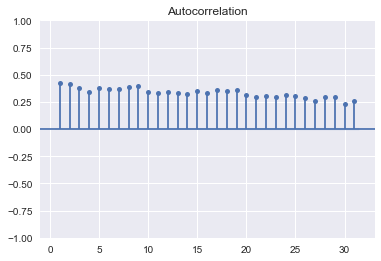

In [64]:
# Garch P & Q Values 

plot_acf(volatility_df['mean_return'], zero=False, alpha = 0.9 )
plt.show()

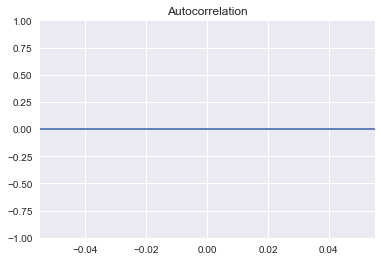

In [65]:
plot_acf(volatility_df['mean_return'].diff())
plt.show()

In [136]:
volatility_df_resampled = volatility_df.resample('W').mean()
volatility_df_resampled.dropna(inplace=True)

model_garch_vol = arch_model(volatility_df_resampled['mean_return'], mean = 'constant', vol = 'GARCH', dist = 'normal' )
model_garch_vol = model_garch_vol.fit(update_freq=5)

Iteration:      5,   Func. Count:     35,   Neg. LLF: 328.02849195520866
Iteration:     10,   Func. Count:     66,   Neg. LLF: 33.468375751791946
Iteration:     15,   Func. Count:     91,   Neg. LLF: 33.11754304694546
Optimization terminated successfully    (Exit mode 0)
            Current function value: 33.1175430466208
            Iterations: 15
            Function evaluations: 91
            Gradient evaluations: 15


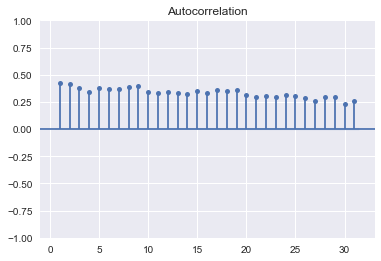

(-2.4817793448593113,
 0.11997078139582396,
 18,
 1132,
 {'1%': -3.436139921033549,
  '5%': -2.86409660029079,
  '10%': -2.568131202693254},
 10402.764901898892)

In [225]:
plot_acf(volatility_df['mean_return'], zero=False, alpha = 0.9 )
plt.show()
adfuller(volatility_df['mean_return'])

In [226]:
model_garch_vol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:            mean_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -33.1175
Distribution:                  Normal   AIC:                           74.2351
Method:            Maximum Likelihood   BIC:                           91.5824
                                        No. Observations:                  565
Date:                Thu, Sep 29 2022   Df Residuals:                      564
Time:                        19:34:04   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.3325  1.734e-02     76.828      0.000 [  1.299,  1.367]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.3053e-03  6.779e-03      1.373      0.170 [-3.981e-03,2.259e-02]
alpha[1]       0.1591  7.161e-02      2.222  2.628e-02    [1.877e-02,  0.299]
beta[1]        0.7082      0.157      4.512  6.423e-06      [  0.401,  1.016]
=============================================================================

Covariance estimator: robust
"""

<AxesSubplot:>

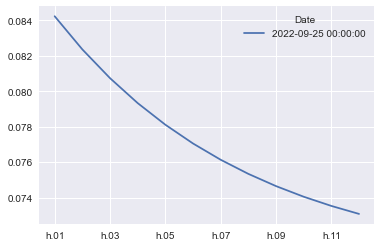

In [143]:
plot = model_garch_vol.forecast(start = volatility_df.index.max(), horizon = 12)

plot.variance[-1:].T.plot()

In [144]:
plot.variance[-1:].T

Date,2022-09-25
h.01,0.084240
h.02,0.082368
h.03,0.080744
h.04,0.079335
h.05,0.078114
h.06,0.077055
h.07,0.076136
h.08,0.075339
h.09,0.074648
h.10,0.074048


In [232]:
def predicted_volatility_garch(volatility_df):
      
    model_garch_vol = arch_model(mean_return, vol = 'GARCH', dist = 'normal', p=1, o=0, q=1, power=2.0 )
    model_garch_vol = model_garch_vol.fit(last_obs=volatility_df.index.max(), update_freq=5)
    garch_model = print(model_garch_vol.summary())
    garch = model_garch_vol.forecast(horizon = 12, reindex=False)
    garch_model = model_garch_vol.plot(annualize='W')
    plt.show()
    
    predicted_volatility_2  = garch.variance[-1:].T.plot(title='Predicted Volatility')
    predicted_volatility_df = garch.variance[-1:].T
    
    return predicted_volatility_2, predicted_volatility_df, garch_model

Iteration:      5,   Func. Count:     33,   Neg. LLF: 5509.830099905819
Iteration:     10,   Func. Count:     59,   Neg. LLF: 5509.655359700431
Iteration:     15,   Func. Count:     84,   Neg. LLF: 5509.306022264353
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5509.305791537313
            Iterations: 18
            Function evaluations: 98
            Gradient evaluations: 18
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            mean_return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -5509.31
Distribution:                  Normal   AIC:                           11026.6
Method:            Maximum Likelihood   BIC:                           11046.8
                                        No. Observations:                 1150
Date:                T

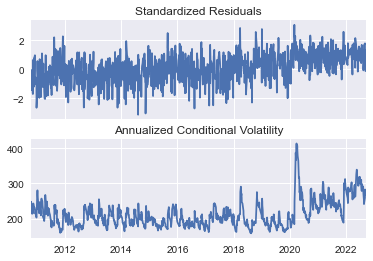

(<AxesSubplot:title={'center':'Predicted Volatility'}>,
 Date  2022-09-19 16:00:00
 h.01          1111.366856
 h.02          1096.594419
 h.03          1082.797469
 h.04          1069.911590
 h.05          1057.876620
 h.06          1046.636370
 h.07          1036.138361
 h.08          1026.333580
 h.09          1017.176251
 h.10          1008.623619
 h.11          1000.635753
 h.12           993.175360,
 <Figure size 432x288 with 2 Axes>)

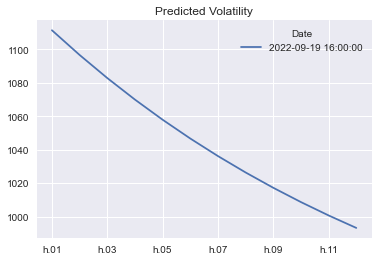

In [237]:
predicted_volatility_garch(volatility_df)

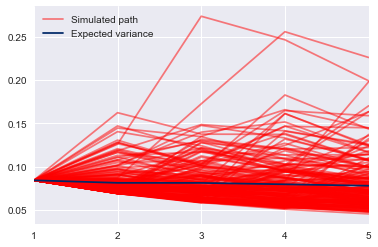

In [240]:
np.random.seed(1)

forecasts = model_garch_vol.forecast(horizon=5, method="simulation", reindex=False)
sims = forecasts.simulations

x = np.arange(1, 6)
lines = plt.plot(x, sims.residual_variances[-1, ::5].T, color="r", alpha=0.5)
lines[0].set_label("Simulated path")
line = plt.plot(x, forecasts.variance.iloc[-1].values, color="#002868")
line[0].set_label("Expected variance")
plt.gca().set_xticks(x)
plt.gca().set_xlim(1, 5)
legend = plt.legend()

ValueError: x and y can be no greater than 2D, but have shapes (1,) and (1, 1000, 5)

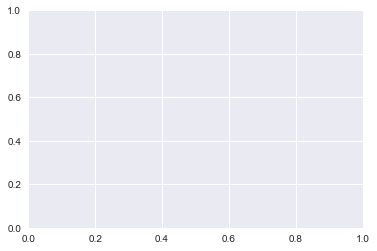

In [236]:
forecasts = model_garch_vol.forecast(horizon=5, method="simulation", reindex=False)
sims = forecasts.simulations
line

plt.plot(sims.residual_variances)

In [ ]:
mean_return